## References
 - __[Script 1: Kaggle](https://www.kaggle.com/code/joshuaswords/covid-19-vaccination-progress/notebook)__
 - __[Script 2: Kaggle](https://www.kaggle.com/code/imdevskp/covid-19-analysis-visualization-comparisons)__
 - __[Script 3: Kaggle](https://www.kaggle.com/code/gatunnopvp/coronavirus-covid-19-growth-updated-05-15-20)__
 - __[Dataset 1: Kaggle](https://www.kaggle.com/datasets/gpreda/covid-world-vaccination-progress/data)__
 - __[Dataset 2: Kaggle](https://www.kaggle.com/datasets/imdevskp/corona-virus-report)__

# Libraries

In [324]:
# Import Libraries
import json                                 # to load json files
from datetime import timedelta              # datetime oprations
from urllib.request import urlopen          # to get web contents
import numpy as np                          # for numerical analyiss
import pandas as pd                         # to store and process data in dataframe
import matplotlib.pyplot as plt             # basic visualization package
import seaborn as sns                       # advanced ploting
import plotly.express as px                 # interactive visualization
import plotly.graph_objs as go              # interactive visualization
from plotly.subplots import make_subplots
from textwrap import wrap

# for offline ploting
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# COVID-19 Cases Worldwide

In [3]:
# Datasets
df = pd.read_csv('../Python/Input/covid_19_clean_complete.csv')

# Correcting Datatype for Date
df["Date"] = pd.to_datetime(df["Date"],format='%Y-%m-%d')

# Filter to latest date
df = df[df["Date"]==max(df["Date"])]

# Group by regions
confirmed = df['Confirmed'].sum()
death     = df['Deaths'].sum()
recovered = df['Recovered'].sum()
# print(confirmed, '\n')
# print(death, '\n')
# print(recovered, '\n')

# Prodouce dataframe with interested data
data = {'Worldwide': [death, recovered]}
df   = pd.DataFrame(data=data, index=['Death', 'Recovered'])

# Show dataset
# df.info()
df.head(10)

Worldwide
Death         654036
Recovered    9468087

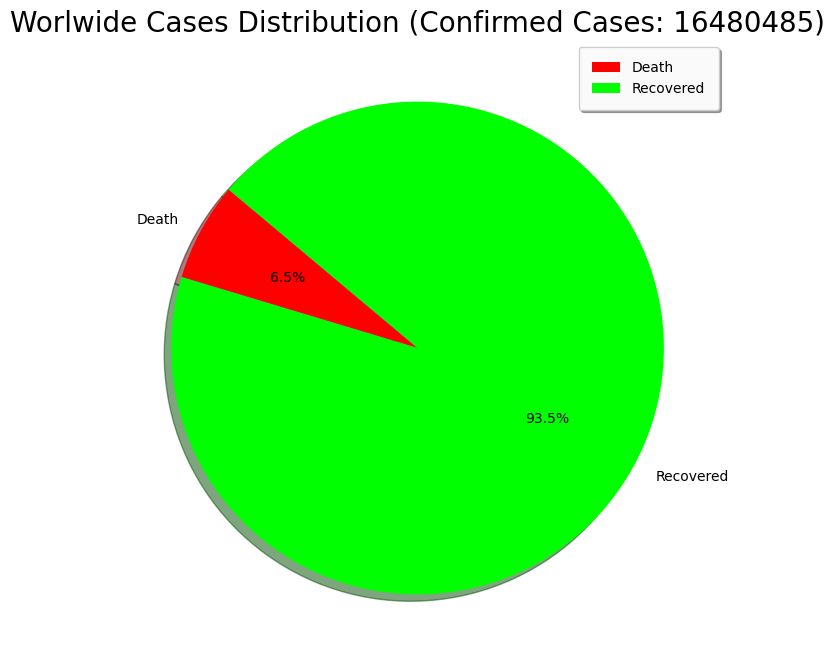

In [13]:
# Plot
df.plot(kind='pie'
           , y='Worldwide'
           , colors=['red','lime']
           , autopct='%1.1f%%' # adding percentagens
           , shadow=True
           , startangle=140
           , figsize = (8, 8) 
           , ylabel = ''
       )

# Plot parameters
plt.title('Worlwide Cases Distribution (Confirmed Cases: ' + str(confirmed) + ')', size=20)
plt.legend(loc = "upper right"
           , frameon = True
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

In [15]:
# Datasets
df = pd.read_csv('../Python/Input/covid_19_clean_complete.csv')

# Correcting Datatype for Date
df["Date"] = pd.to_datetime(df["Date"],format='%Y-%m-%d')

# Filter to latest date
df = df[df["Date"]==max(df["Date"])]

# Group by regions
confirmed = df.groupby(['WHO Region'])['Confirmed'].sum()#.sort_values(ascending=False)
death     = df.groupby(['WHO Region'])['Deaths'].sum()#.sort_values(ascending=False)
recovered = df.groupby(['WHO Region'])['Recovered'].sum()#.sort_values(ascending=False)
# print(confirmed, '\n')
# print(death, '\n')
# print(recovered, '\n')

# Prodouce dataframe with interested data
data = {'Confirmed': confirmed,
        'Death': death,
        'Recovered': recovered}
df   = pd.DataFrame(data=data)#.reset_index(drop=False)

# Show dataset
# df.info()
df.head(10)

Confirmed   Death  Recovered
WHO Region                                         
Africa                    723207   12223     440645
Americas                 8839286  342732    4468616
Eastern Mediterranean    1490744   38339    1201400
Europe                   3299523  211144    1993723
South-East Asia          1835297   41349    1156933
Western Pacific           292428    8249     206770

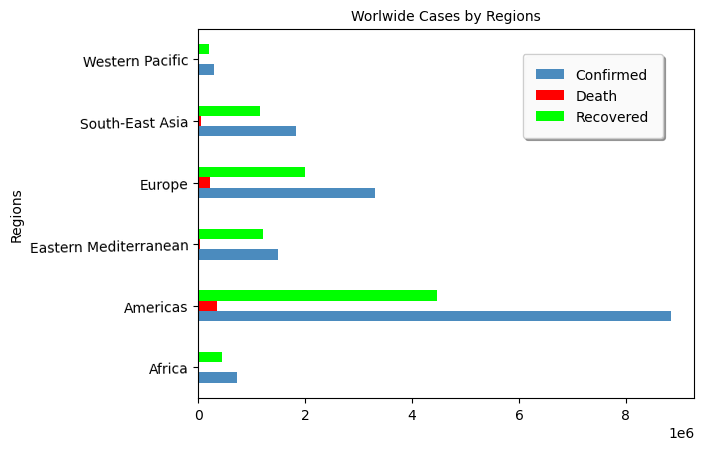

In [271]:
# Plot
df.plot(kind = 'barh', 
        # figsize = (20,30), 
        color = ['#4b8bbe','red','lime'], 
        width = 0.5, 
        rot = 1) 

# Plot parameters
plt.title('Worlwide Cases by Regions', size=10)
plt.ylabel('Regions')
# plt.yticks(size=20)
# plt.xticks(size=20)
plt.legend(bbox_to_anchor=(0.95,0.95) # setting coordinates for the caption box
           , frameon = True
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

In [96]:
# Datasets
df = pd.read_csv('../Python/Input/covid_19_clean_complete.csv')

# Correcting Datatype for Date
df["Date"] = pd.to_datetime(df["Date"],format='%Y-%m-%d')

# Extract Months and Years
df['Month']      = df['Date'].dt.month
df['Month_name'] = df['Date'].dt.month_name()

# Keep interested datasets only
df = df[['Month', 'Month_name', 'Confirmed', 'Deaths', 'Recovered']]

# Show dataset
# df.info()
# df.head(10)

# Group by date
# print(min(df["Date"]))
# print(max(df["Date"]))
df = df.groupby('Month_name')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Sort months
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July']
df = df.reindex(new_order, axis=0)
df.head(20)

Confirmed    Deaths  Recovered
Month_name                                
January         38534       889        838
February      1663437     46875     363669
March         9002815    397601    2644372
April        63391662   4311214   15944020
May         144990399   9609604   52876838
June        246525787  13309053  116984268
July        362895848  15709667  199594224

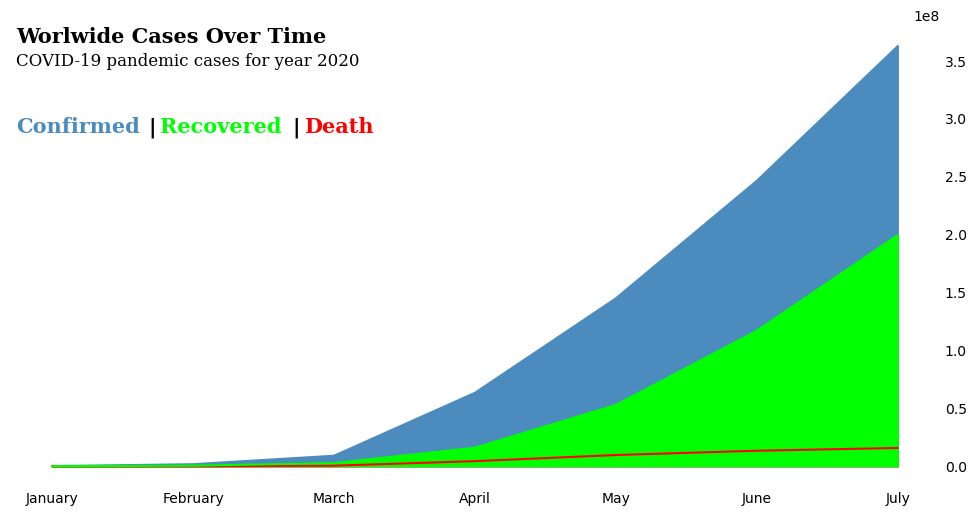

In [152]:
# Data for plots
color = ['#4b8bbe','red','lime']
data  = df.columns

# Plots
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

for i in range(0,len(data)):
    ax.plot(df.index,df[data[i]], color=color[i])
    ax.fill_between(df.index, df[data[i]], color=color[i])

ax.yaxis.tick_right()

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.tick_params(axis=u'both', which=u'both',length=0)

# Text
fig.text(0.13, 0.85, 'Worlwide Cases Over Time', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.78, 
'''COVID-19 pandemic cases for year 2020
'''
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.13,0.7,"Confirmed", fontweight="bold", fontfamily='serif', fontsize=15, color=color[0])
fig.text(0.24,0.7,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.25,0.7,"Recovered", fontweight="bold", fontfamily='serif', fontsize=15, color=color[2])
fig.text(0.36,0.7,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.37,0.7,"Death", fontweight="bold", fontfamily='serif', fontsize=15, color=color[1])

plt.show()

In [94]:
# Datasets
country_wise = pd.read_csv('../Python/Input/country_wise_latest.csv')
country_wise = country_wise.replace('', np.nan).fillna(0)
country_wise.head()

Country/Region Code  Confirmed  Deaths  Recovered  Active  New cases  \
0    Afghanistan  AFG      36263    1269      25198    9796        106   
1        Albania  ALB       4880     144       2745    1991        117   
2        Algeria  DZA      27973    1163      18837    7973        616   
3        Andorra  AND        907      52        803      52         10   
4         Angola  AGO        950      41        242     667         18   

   New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0          10             18                3.50                  69.49   
1           6             63                2.95                  56.25   
2           8            749                4.16                  67.34   
3           0              0                5.73                  88.53   
4           1              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1                    5.25                 4171            709   
2                    6.17                23691           4282   
3                    6.48                  884             23   
4                   16.94                  749            201   

   1 week % increase             WHO Region  
0               2.07  Eastern Mediterranean  
1              17.00                 Europe  
2              18.07                 Africa  
3               2.60                 Europe  
4              26.84                 Africa

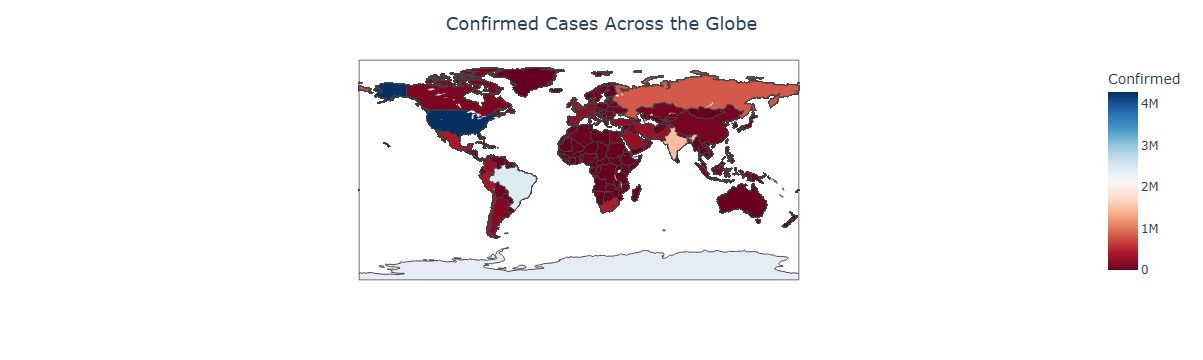

In [200]:
def plot_map(df, col, pal):
    fig = px.choropleth(df, locations="Country/Region", locationmode='country names', 
                  color=col, hover_name="Country/Region", 
                  hover_data=[col], color_continuous_scale=pal)
    # fig.update_layout(coloraxis_showscale=False)
    fig.update_layout(autosize=False,
                      
                      title=dict(
                            text='Confirmed Cases Across the Globe',
                            x=.5,
                            font_size=18,
                            ))
    fig.show()

plot_map(country_wise, 'Confirmed', 'RdBu')

# COVID-19 Cases in Europe

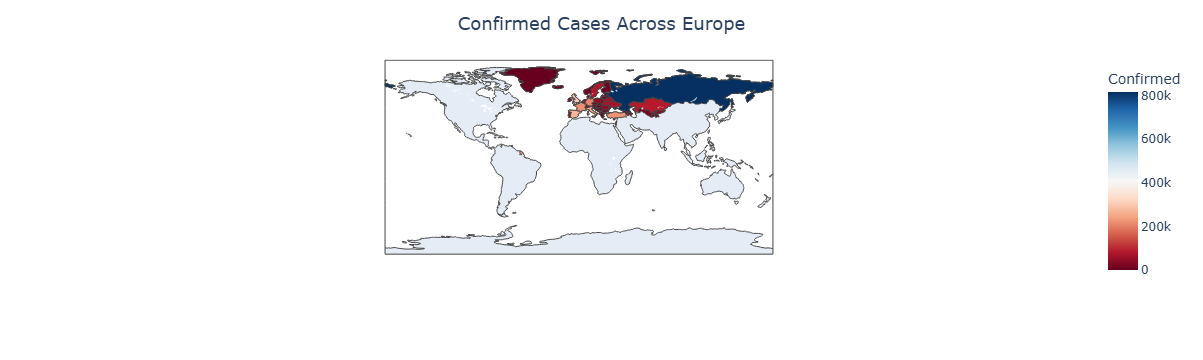

In [161]:
def plot_map(df, col, pal):
    df = df[df['WHO Region']=='Europe']
    fig = px.choropleth(df, locations="Code", locationmode='ISO-3', 
                  color=col, hover_name="Country/Region", 
                  hover_data=[col], color_continuous_scale=pal)
    # fig.update_layout(coloraxis_showscale=False)
    fig.update_layout(autosize=False,
                      
                      title=dict(
                            text='Confirmed Cases Across Europe',
                            x=.5,
                            font_size=18,
                            ))
    fig.show()

plot_map(country_wise, 'Confirmed', 'RdBu')

In [164]:
# Datasets
df = pd.read_csv('../Python/Input/full_grouped.csv')
df = df[df['WHO Region']=='Europe']
df = df[['Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
df = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum().sort_values(by='Confirmed',ascending=False).reset_index()[:10]

# Show dataset
# df.info()
# df.head(10)

df.style.background_gradient(cmap='Reds')

In [183]:
# Datasets
full_grouped = pd.read_csv('../Python/Input/full_grouped.csv')
full_grouped = country_wise.replace('', np.nan).fillna(0)

# Correcting Datatype for Date
full_grouped["Date"] = pd.to_datetime(full_grouped["Date"],format='%Y-%m-%d')

full_grouped.head()

Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0 2020-01-22    Afghanistan          0       0          0       0          0   
1 2020-01-22        Albania          0       0          0       0          0   
2 2020-01-22        Algeria          0       0          0       0          0   
3 2020-01-22        Andorra          0       0          0       0          0   
4 2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region  
0           0              0  Eastern Mediterranean  
1           0              0                 Europe  
2           0              0                 Africa  
3           0              0                 Europe  
4           0              0                 Africa

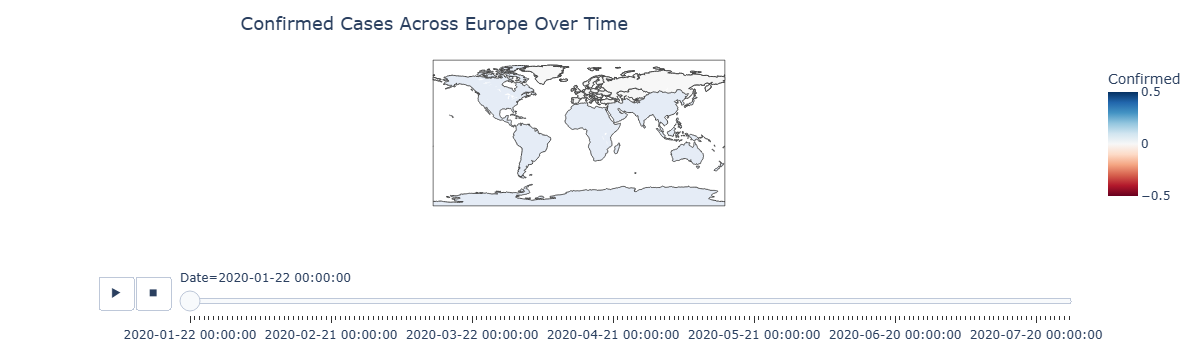

In [193]:
def plot_map(df, col, pal):
    df = df[df['WHO Region']=='Europe']
    fig = px.choropleth(df, 
                        locations="Country/Region", locationmode='country names', 
                        color=col, hover_name="Country/Region", 
                        hover_data=[col], color_continuous_scale=pal,
                        animation_frame="Date")
    # fig.update_layout(coloraxis_showscale=False)
    fig.update_layout(autosize=False,
                      
                      title=dict(
                            text='Confirmed Cases Across Europe Over Time',
                            x=.2,
                            font_size=18,
                            ))
    
    fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 100
    fig.show()

plot_map(full_grouped, 'Confirmed', 'RdBu')

# COVID-19 Vaccine Providers/Manufacturers

In [443]:
# Datasets
df = pd.read_csv('../Python/Input/country_vaccinations_by_manufacturer.csv')

# Keep interested datasets only
df = df[['vaccine', 'total_vaccinations']]

# Show dataset
# df.info()
# df.head(10)

# Group by vaccine providers
df = df.groupby('vaccine')[['total_vaccinations']].sum().sort_values(by='total_vaccinations',ascending=False).reset_index()[:5]

# Show dataset
# df.info()
df.head(10)

vaccine  total_vaccinations
0     Pfizer/BioNTech        344835955037
1             Moderna        103072147621
2  Oxford/AstraZeneca         46451509497
3             Sinovac         13407163275
4     Johnson&Johnson         12611375881

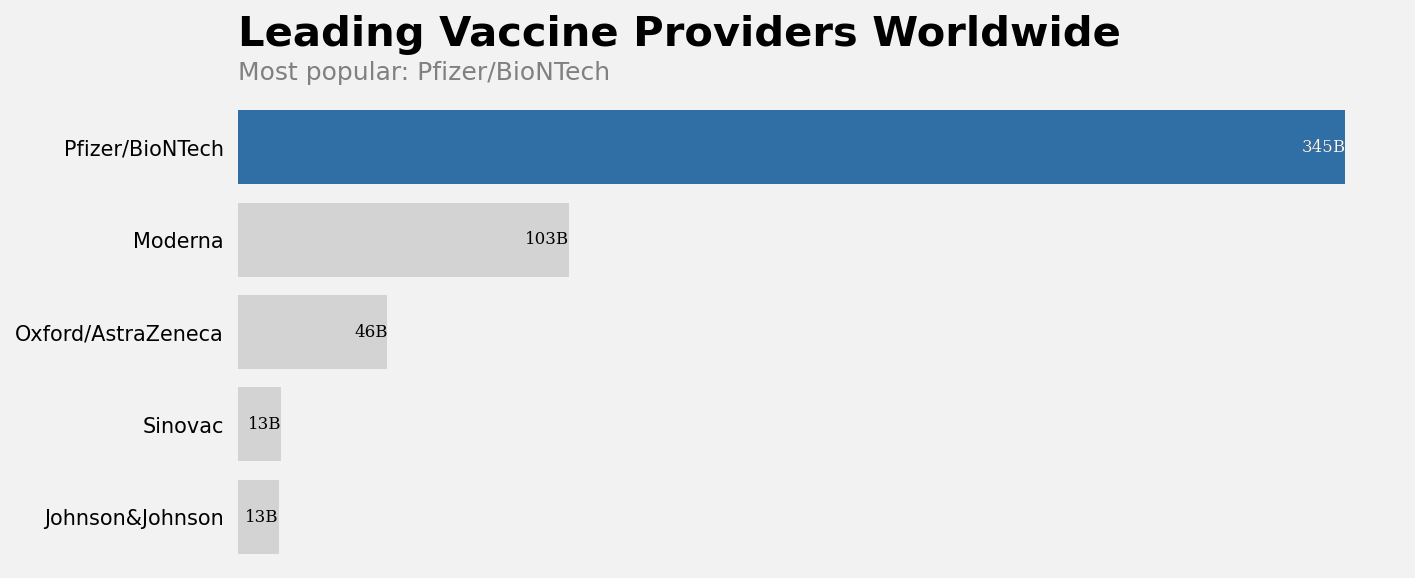

In [457]:
# Color schemes
uk = '#1d70b8'
dark_uk = '#003078'
others = 'lightgray'
background_color = "#f2f2f2"

# Plots
fig = plt.figure(figsize=(10, 4),dpi=150, facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top","bottom","left"]:
    ax0.spines[s].set_visible(False)

ax0.tick_params(axis = "both", which = "both", left=False, bottom=False,labelbottom=False)

ax0.text(0, -1, 'Leading Vaccine Providers Worldwide', color='black', fontsize=20, ha='left', va='bottom', weight='bold')
ax0.text(0, -0.93, 'Most popular: Pfizer/BioNTech', 
         color='gray', fontsize=12, ha='left', va='top')

color_map = [others for _ in range(5)]
color_map[0] = uk # color highlight

sns.barplot(data=df, x='total_vaccinations', y='vaccine', palette=color_map, zorder=2, orient='h')
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.grid(False)
# ax0.tick_params(labelsize=5)

# ax0.set_yticklabels([])

labels = np.divide(df['total_vaccinations'].values.tolist(),1000000000)
for i in range(0,5):
    ax0.annotate('%.0f' % labels[i] + 'B', 
                   xy=(df['total_vaccinations'][i]-20, i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='serif',fontsize=8, color='black',rotation=0)
    if i == 0:
        ax0.annotate('%.0f' % labels[i] + 'B', 
               xy=(df['total_vaccinations'][i]-20, i), 
               va = 'center', ha='right',fontweight='light', fontfamily='serif',fontsize=8, color='white',rotation=0)

plt.show()

In [619]:
#source: https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b

import geopandas
import matplotlib.colors
import pycountry 

# Datasets
df = pd.read_csv('../Python/Input/country_vaccinations_by_manufacturer.csv')

# Data prep
df = df[df['vaccine']=='Pfizer/BioNTech']
df = df[['location']].drop_duplicates()

# Show datasets
# df.info()
# df.head(10)

# Produce country code
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
    
# create a column for code 
df['CODE']=alpha3code(df['location'])

# load the shapefile 
path               = "../Python/Input/ne_110m_admin_0_sovereignty/"
geo_county         = geopandas.read_file(path+'ne_110m_admin_0_sovereignty.shp')
geo_county         = geo_county[['CONTINENT', 'NAME', 'geometry']]
geo_county['CODE'] = alpha3code(geo_county['NAME'])

# Show datasets
# geo_county.info()
# geo_county.head(10)

# then merge with our data 
merge=pd.merge(geo_county,df,on='CODE')

# Show dataset
merge.info()
merge.head(10)


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   CONTINENT  89 non-null     object  
 1   NAME       89 non-null     object  
 2   geometry   89 non-null     geometry
 3   CODE       89 non-null     object  
 4   location   89 non-null     object  
dtypes: geometry(1), object(4)
memory usage: 3.6+ KB


CONTINENT                      NAME  \
0         Africa                  Tanzania   
1         Africa                  Tanzania   
2         Africa                 W. Sahara   
3         Africa                 W. Sahara   
4  North America  United States of America   
5  North America  United States of America   
6  South America                 Argentina   
7  South America                     Chile   
8         Africa           Dem. Rep. Congo   
9         Africa           Dem. Rep. Congo   

                                            geometry  CODE        location  
0  POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...  None     South Korea  
1  POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...  None  European Union  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  None     South Korea  
3  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  None  European Union  
4  MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...  None     South Korea  
5  MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...  None  European Union  
6  MULTIPOLYGON (((-68.63401 -52.63637, -68.25 -5...   ARG       Argentina  
7  MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...   CHL           Chile  
8  POLYGON ((29.34 -4.49998, 29.51999 -5.41998, 2...  None     South Korea  
9  POLYGON ((29.34 -4.49998, 29.51999 -5.41998, 2...  None  European Union

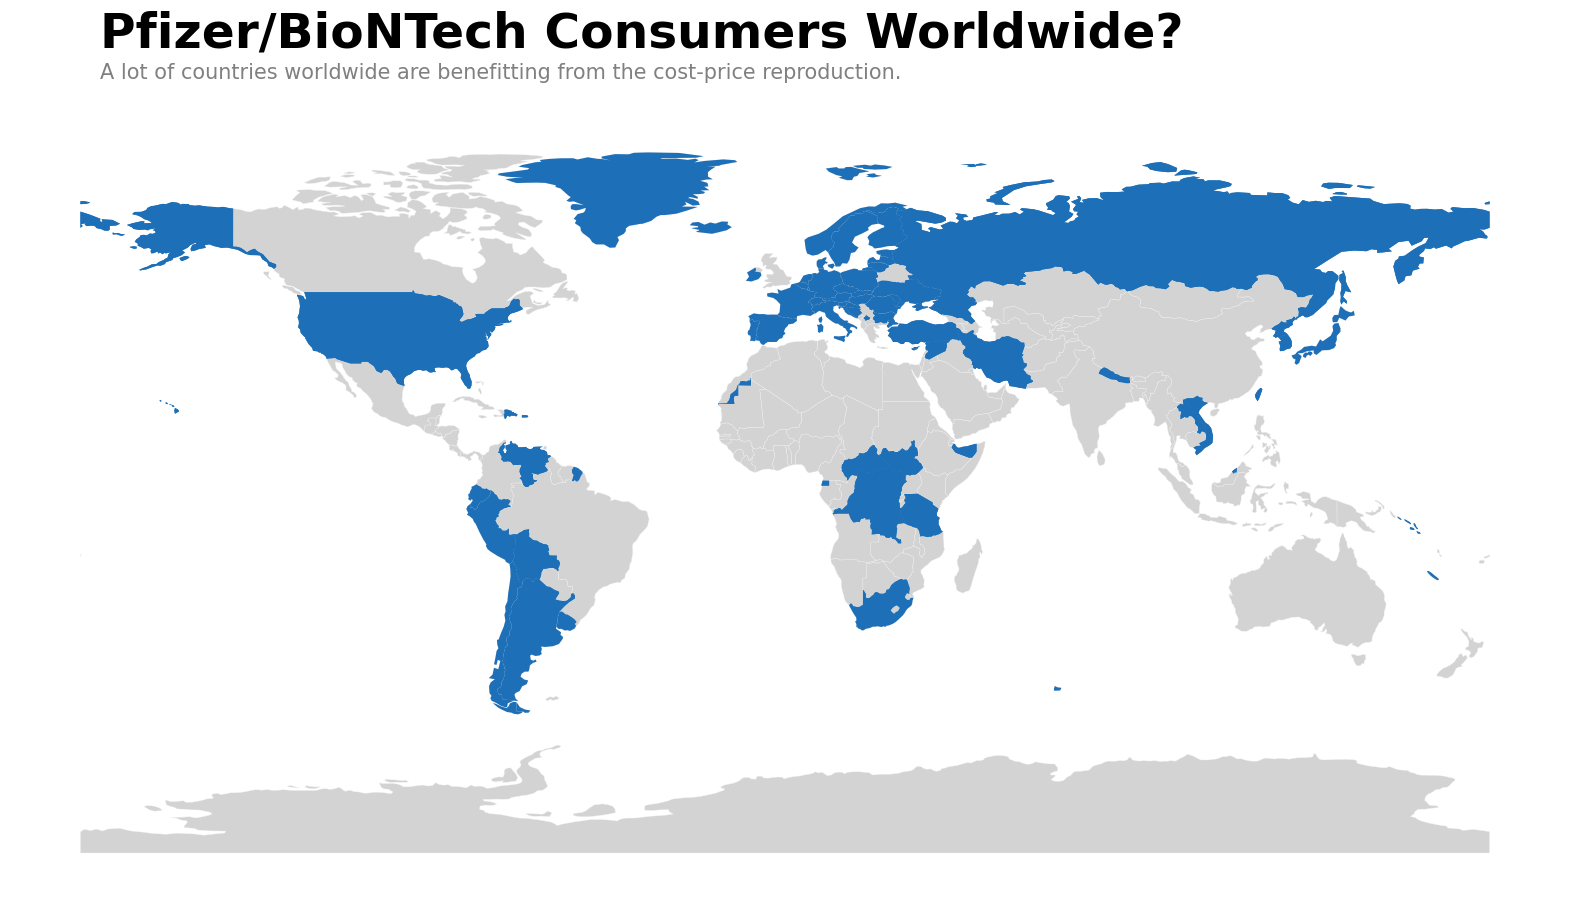

In [625]:
# Custom colour map
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [others,uk])

ax = geo_county.plot(figsize=(20,15), linewidth=0.25, edgecolor=background_color, color=others)
ax.axis('off')
ax.set_facecolor(background_color)
merge.plot(column='location',figsize=(20, 15),legend=False,color=uk,ax=ax)

ax.text(-175,110,'Pfizer/BioNTech Consumers Worldwide?',fontsize=35,fontweight='bold')
ax.text(-175,102,'A lot of countries worldwide are benefitting from the cost-price reproduction.',color='gray',fontsize=15)

plt.show()


In [459]:
# Datasets
df = pd.read_csv('../Python/Input/country_vaccinations_by_manufacturer.csv')

# Keep interested datasets only
df = df[df['vaccine']=='Pfizer/BioNTech']
df = df[['location', 'total_vaccinations']]

# Show dataset
# df.info()
# df.head(10)

# Group by country
df = df.groupby('location')[['total_vaccinations']].sum().sort_values(by='total_vaccinations',ascending=False).reset_index()[:5]

# Show dataset
# df.info()
df.head(10)

location  total_vaccinations
0  European Union        141033652111
1   United States         79776473000
2         Germany         29153644591
3          France         25225323599
4           Italy         20532273075

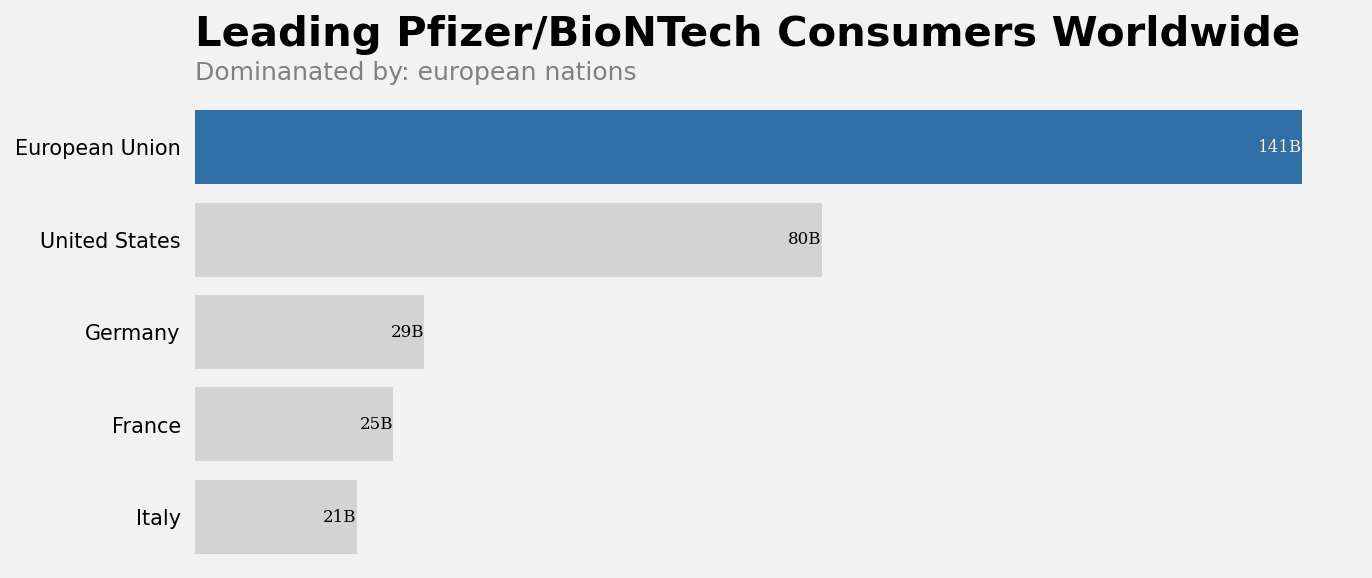

In [461]:
# Plots
fig = plt.figure(figsize=(10, 4),dpi=150, facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top","bottom","left"]:
    ax0.spines[s].set_visible(False)

ax0.tick_params(axis = "both", which = "both", left=False, bottom=False,labelbottom=False)

ax0.text(0, -1, 'Leading Pfizer/BioNTech Consumers Worldwide', color='black', fontsize=20, ha='left', va='bottom', weight='bold')
ax0.text(0, -0.93, 'Dominanated by: european nations', 
         color='gray', fontsize=12, ha='left', va='top')

color_map = [others for _ in range(5)]
color_map[0] = uk # color highlight

sns.barplot(data=df, x='total_vaccinations', y='location', palette=color_map, zorder=2, orient='h')
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.grid(False)
# ax0.tick_params(labelsize=5)

# ax0.set_yticklabels([])

labels = np.divide(df['total_vaccinations'].values.tolist(),1000000000)
for i in range(0,5):
    ax0.annotate('%.0f' % labels[i] + 'B', 
                   xy=(df['total_vaccinations'][i]-20, i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='serif',fontsize=8, color='black',rotation=0)
    if i == 0:
        ax0.annotate('%.0f' % labels[i] + 'B', 
               xy=(df['total_vaccinations'][i]-20, i), 
               va = 'center', ha='right',fontweight='light', fontfamily='serif',fontsize=8, color='white',rotation=0)

plt.show()

In [463]:
cst_vac = pd.DataFrame(columns=['Cost Per Dose'],
                      data = [4,10,20,30,37])

Manufacturers ='Oxford/AstraZeneca','Johnson & Johnson','Pfizer/BioNTech','Sinovac','Moderna'

cst_vac['Provider'] = Manufacturers

cst_vac.info()
cst_vac.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Cost Per Dose  5 non-null      int64 
 1   Provider       5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


Cost Per Dose            Provider
0              4  Oxford/AstraZeneca
1             10   Johnson & Johnson
2             20     Pfizer/BioNTech
3             30             Sinovac
4             37             Moderna

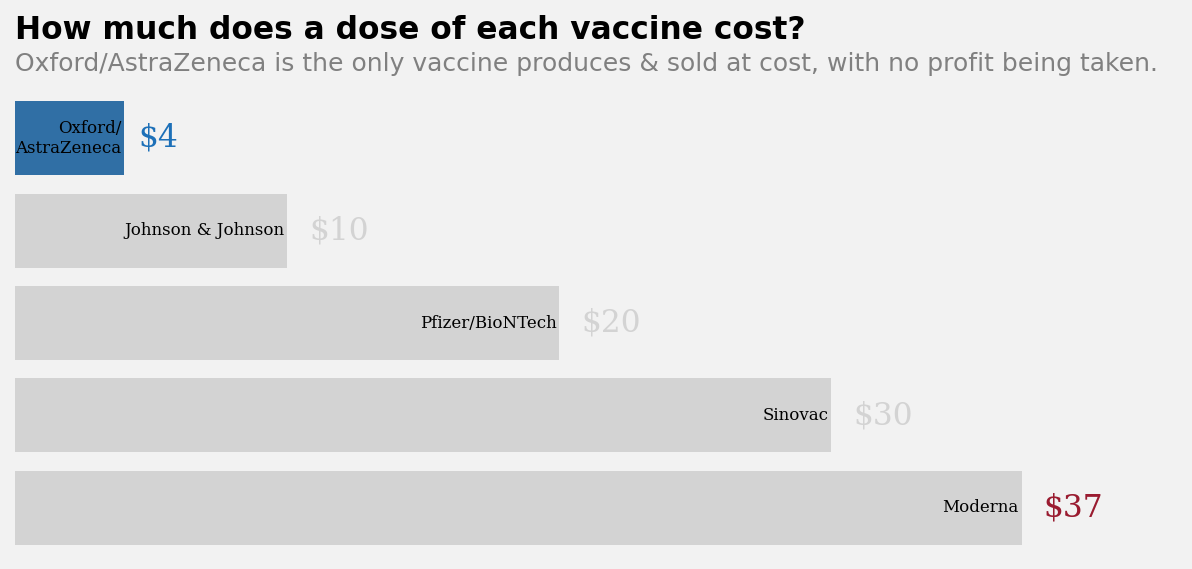

In [465]:
fig = plt.figure(figsize=(10, 4),dpi=150, facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top","bottom","left"]:
    ax0.spines[s].set_visible(False)

ax0.tick_params(axis = "both", which = "both", left=False, bottom=False,labelbottom=False)

ax0.text(0, -1, 'How much does a dose of each vaccine cost?', color='black', fontsize=15, ha='left', va='bottom', weight='bold')
ax0.text(0, -0.93, 'Oxford/AstraZeneca is the only vaccine produces & sold at cost, with no profit being taken.', 
         color='gray', fontsize=12, ha='left', va='top')

color_map = [others for _ in range(5)]
color_map[0] = uk # color highlight
sns.barplot(ax=ax0, y=cst_vac['Provider'], x=cst_vac['Cost Per Dose']*1.1,color=background_color, zorder=2, orient='h')

sns.barplot(ax=ax0, y=cst_vac['Provider'], x=cst_vac['Cost Per Dose'],palette=color_map, zorder=2, orient='h')

ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.grid(False)
ax0.tick_params(labelsize=5)

labels = [ '\n'.join(wrap(l, 40)) for l in cst_vac['Provider'] ]
ax0.set_yticklabels([])

for i in range(1,5):
    ax0.annotate(cst_vac['Provider'][i], 
                   xy=(cst_vac['Cost Per Dose'][i]-0.1, i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='serif',fontsize=8, color='black',rotation=0)

    ax0.annotate(f"${cst_vac['Cost Per Dose'][i]}", 
                   xy=(cst_vac['Cost Per Dose'][i]+3, i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='serif',fontsize=15, color=others,rotation=0)
# diff color text
for i in range(0,1):
    ax0.annotate('$4', 
                   xy=(cst_vac['Cost Per Dose'][i]+2, i),
                    va = 'center', ha='right',fontweight='light', fontfamily='serif',fontsize=15, color=uk,rotation=0)
    ax0.annotate('Oxford/\nAstraZeneca', 
                   xy=(cst_vac['Cost Per Dose'][i]-0.1, i),
                    va = 'center', ha='right',fontweight='light', fontfamily='serif',fontsize=8, color='black',rotation=0)
    
for i in range(4,5):
    ax0.annotate('$37', 
                   xy=(cst_vac['Cost Per Dose'][i]+3, i),
                    va = 'center', ha='right',fontweight='light', fontfamily='serif',fontsize=15, color='#9b1b30',rotation=0)        


plt.show()

In [467]:
# Datasets
world_country_pop = pd.read_csv('../Python/Input/worldometer_data.csv')
world_country_pop_median = world_country_pop['Population'].median()

cst_vac['Cost for mean Country Population'] = cst_vac['Cost Per Dose']*world_country_pop_median

# Show datasets
cst_vac.head(10)

Cost Per Dose            Provider  Cost for mean Country Population
0              4  Oxford/AstraZeneca                        28167890.0
1             10   Johnson & Johnson                        70419725.0
2             20     Pfizer/BioNTech                       140839450.0
3             30             Sinovac                       211259175.0
4             37             Moderna                       260552982.5

In [469]:
# import the circlify library
import circlify

# compute circle positions:
circles = circlify.circlify(
    cst_vac['Cost for mean Country Population'].tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

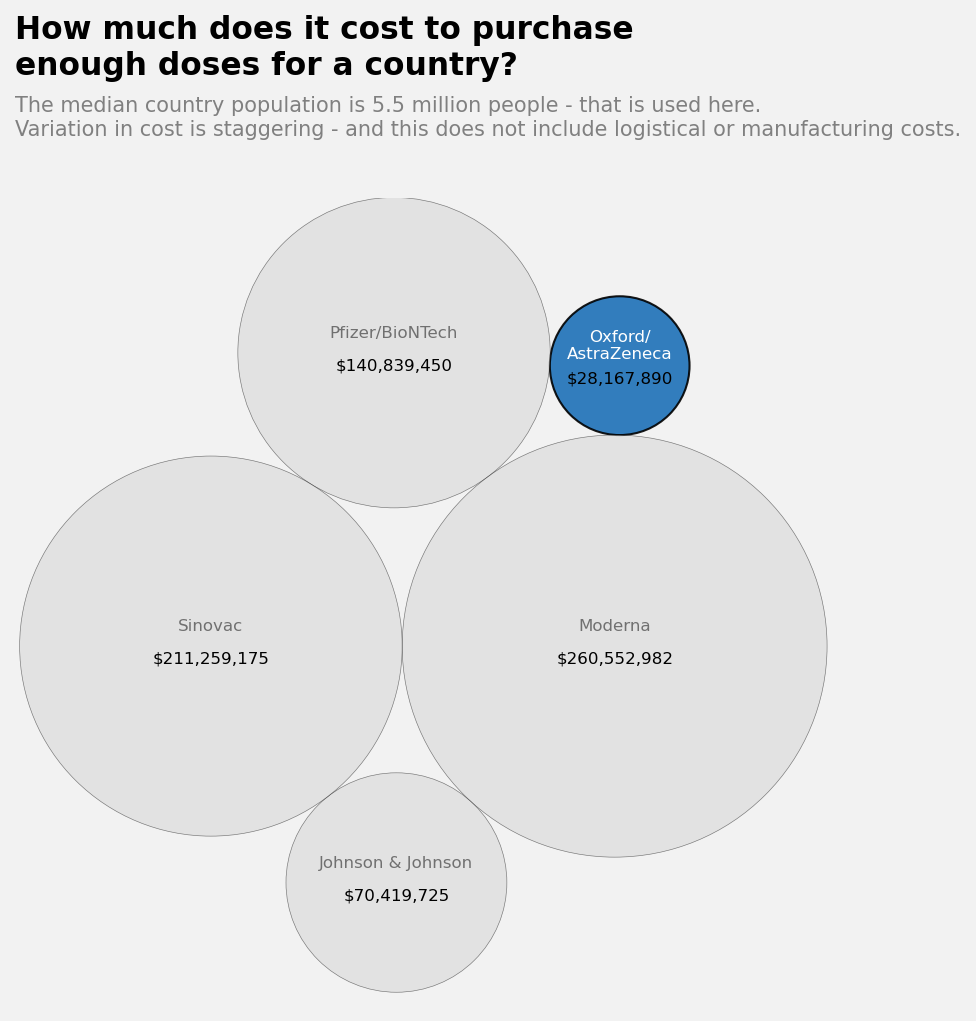

In [471]:
# Plots
fig = plt.figure(figsize=(7, 7),dpi=150, facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax = fig.add_subplot(gs[0, 0])
ax.set_facecolor(background_color)
for s in ["right", "top","bottom","left"]:
    ax.spines[s].set_visible(False)

ax.set_facecolor(background_color)

# Title
ax.text(-1,1.3,'How much does it cost to purchase\nenough doses for a country?',fontsize=15,fontweight='bold')
ax.text(-1,1.15,'The median country population is 5.5 million people - that is used here.\nVariation in cost is staggering - and this does not include logistical or manufacturing costs.',color='gray',fontsize=10)

# # Remove axes
ax.axis('off')

# # Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = cst_vac['Provider']
costs  = cst_vac['Cost for mean Country Population']

# print circles
for circle, label in zip(circles, labels):
    if label == 'Oxford/AstraZeneca':
        x, y, r = circle
        ax.add_patch(plt.Circle((x, y), r, alpha=0.9, linewidth=1, facecolor=uk, edgecolor="black"))
        plt.annotate('Oxford/\nAstraZeneca', (x,y+0.05) ,va='center', ha='center',color='white', fontsize=8)
        
    else:
        x, y, r = circle
        ax.add_patch(plt.Circle((x, y), r, alpha=0.5, linewidth=0.3, facecolor=others, edgecolor="black"))
        plt.annotate(label, (x,y+0.05) ,va='center', ha='center', fontsize=8, alpha=0.5)
    
for circle, costs in zip(circles, costs):
        x, y, r = circle
        plt.annotate(f"${format(round(costs), ',')}", (x,y-0.03) ,va='center', ha='center', fontsize=8) 
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5)
        

In [473]:
vac = pd.DataFrame(columns = ['Manufacturers'],
                      data = ['Sinovac', 'Johnson &\n Johnson', 'Oxford/\nAstraZeneca','Moderna','Pfizer/\nBioNTech'])

vac['Storage Positive Temp'] = [6, 6, 4, 0, 0]
vac['Storage Negative Temp'] = [0, 0, 0, -20, -70]

# Show datasets
vac.head(10)

Manufacturers  Storage Positive Temp  Storage Negative Temp
0               Sinovac                      6                      0
1   Johnson &\n Johnson                      6                      0
2  Oxford/\nAstraZeneca                      4                      0
3               Moderna                      0                    -20
4     Pfizer/\nBioNTech                      0                    -70

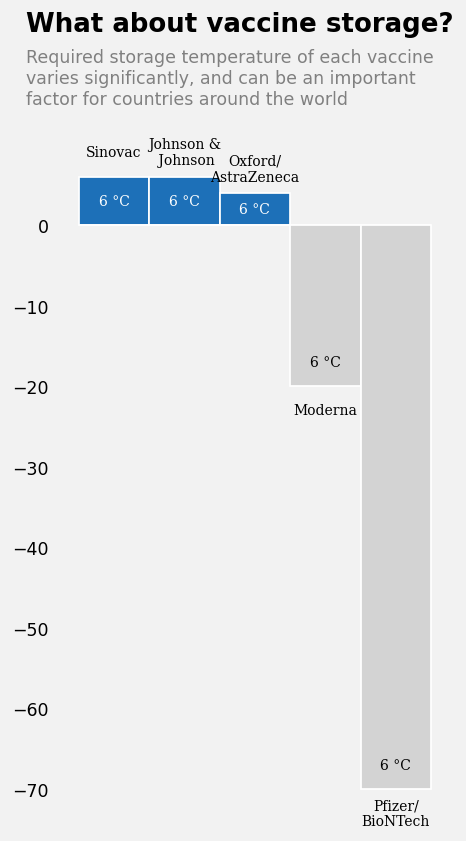

In [475]:
fig = plt.figure(figsize=(4, 7),dpi=125, facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax = fig.add_subplot(gs[0, 0])
ax.set_facecolor(background_color)
for s in ["right", "top","bottom","left"]:
    ax.spines[s].set_visible(False)

ax.set_facecolor(background_color)

x = range(5)

ax.bar(x, vac['Storage Positive Temp'], width=1, ec='white', color=uk)
ax.bar(x, vac['Storage Negative Temp'], width=1, ec='white', color=others)

ax.set_xticklabels([])
ax.tick_params(axis = "both", which = "both", left=False, bottom=False,labelbottom=False)

ax.text(-1.25,24,'What about vaccine storage?',fontsize=15,fontweight='bold')
ax.text(-1.25,15,'Required storage temperature of each vaccine\nvaries significantly, and can be an important\nfactor for countries around the world',color='gray',fontsize=10)

for i in range(0,3):
    ax.annotate(vac['Manufacturers'][i],                      xy=(x[i], vac['Storage Positive Temp'][i]+3), va = 'center', ha='center',fontweight='light', fontfamily='serif',fontsize=8, color='black',rotation=0)
    ax.annotate(str(vac['Storage Positive Temp'][0]) + ' °C', xy=(x[i], vac['Storage Positive Temp'][i]/2), va = 'center', ha='center',fontweight='light', fontfamily='serif',fontsize=8, color='white',rotation=0)

for i in range(3,5):
    ax.annotate(vac['Manufacturers'][i],                      xy=(x[i], vac['Storage Negative Temp'][i]-3), va = 'center', ha='center',fontweight='light', fontfamily='serif',fontsize=8, color='black',rotation=0)
    ax.annotate(str(vac['Storage Positive Temp'][0]) + ' °C', xy=(x[i], vac['Storage Negative Temp'][i]+3), va = 'center', ha='center',fontweight='light', fontfamily='serif',fontsize=8, color='black',rotation=0)

plt.show()